<a href="https://colab.research.google.com/github/Daniel-Juri/Sentimental-Analysis-on-Asake/blob/main/Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALYZING TWITTER USERS PERCEPTION ON ASAKE**

# **INTRODUCTION**

This Data analysis project aims to extract tweets that relating to the artist "Asake" using a Python library called Twint and performing a more detailed sentimental analysus using Natural language Processing (NLP) techniques. In the year 2022, Asake saw a massive rise in fame and his album that released that same year helped propel this fame. This project would make use of several Python libraries to extract, clean, visualize and store the data. This project would also take use of a cloud service called Harper DB Cloud to manage the data thus making it faster, more scalable, and accessible. Lastly, a dashboard would be built to visualize the findings from this project. 

# **IMPORT LIBRARIES**

Import libraries to be used in this Project.

In [1]:
# Import Libraries
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
!pip install aiohttp==3.7.0
!pip install nest_asyncio
import twint #for tweet mining
import nest_asyncio #Needed for twint library to run
nest_asyncio.apply() #Needed for twint library to run

#Data manipulation
import numpy as np 
import pandas as pd
import csv #to read and write csv files 
import re #for using and maipulating regular expressions
import string #for string manipulation
from collections import Counter #to determine word count frequency

#Natural Language Processing Toolkit (NTLK)
import nltk
from nltk.corpus import stopwords #get stopwords in NTLK library
from nltk.tokenize import word_tokenize #create word tokens(small bits)
from nltk.stem import WordNetLemmatizer #converts words to its meaningful base form
nltk.download("stopwords") #downloads stopwords from NLTK library
nltk.download('punkt') #divides tweets into a list of sentences 
nltk.download('wordnet') #find the meanings of words, synonyms, antonyms, and more
nltk.download('omw-1.4') #Open Multilingual Wordnet for other languages
from nltk.tokenize import TweetTokenizer #convert a stream of tweets into small tokens 
nltk.downloader.download('vader_lexicon') #lexicon and rule-based sentiment analysis tool 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Data visualization
import textblob #for processing text data format
from textblob import TextBlob
from wordcloud import WordCloud #creates image word cloud
import matplotlib.pyplot as plt #creates figures, plotting area in figures, plots some lines in a plotting area, decorates the plot with labels etc
import plotly.express as px

#Data cleaning
!pip install tweet-preprocessor
import preprocessor as p #library to clean, parse or tokenize the tweets

#Sets limits on Panda Dataframe display
pd.set_option('display.max_columns',None)

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 263 kB 7.9 MB/s 
     |████████████████████████████████| 384 kB 29.6 MB/s 
     |████████████████████████████████| 288 kB 10.9 MB/s 
     |████████████████████████████████| 59 kB 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **DATA SCRAPING**

I used the twint library to scrape tweets. I specifically choose this library over tweepy and snscrape due to its simplicity and no need for authentication/developer account.

In [2]:
c = twint.Config() 

c.Search = "Asake"  # key words to look for.  
c.Limit = 50000  #number of tweets to scrape     
c.Store_csv = True
c.Output = "Tweets.csv" #Store out in file called Tweets.csv

twint.run.Search(c)

Streaming output truncated to the last 5000 lines.
1580287430720356352 2022-10-12 20:00:58 +0000 <preachermaneug> @BlaqBonez @perlikspictures BlaqBonez recreated Wizkid,Rugar,Portable,Ayra star,Oxlade,Buju BNXN,Asake and others in his video,it’s seems you guys didn’t see the part he shaded Carter Efe in the video, after dissing  him saying he spent a lot not to look like him. 🤣🤣🤣🤣 Emeka do this one  https://t.co/inzukXRGFy
1580287405365424129 2022-10-12 20:00:52 +0000 <iamlighte> @Rahms__ Is he mimicking Asake😭😭
1580287399975784448 2022-10-12 20:00:51 +0000 <HeymanAbhi> @Chukwu2252 @odoombenjamin3 @afronation @MeekMill @asakemusik @shattawalegh @sarkodie @KiDiMusic It just that l don't have tym for such tins ahhhh rema,don't provoke is it de calm down song or what Funnt world
1580287350445260800 2022-10-12 20:00:39 +0000 <_IMOBit> @IrohaJoenn4u @NgLabour @joe_asake Done. Well done sir
1580287329230475264 2022-10-12 20:00:34 +0000 <Andadeyforyou> @BlaqBonez @CynthiaIgobah Asake         

# **DATA EXPLORATION AND CLEANING**

After automating the data scraping process using the Twint library, it is time to assess and clean the data for possible errors. Data exploration is necessary to identify and remove inconsistencies such as duplicates, null values or unnecessary columns.

In [3]:
df = pd.read_csv('Tweets.csv') #read the data to make it accessible for manipulation

In [4]:
print("There are {} rows and {} columns in this dataset. \n".format(df.shape[0], df.shape[1])) #get number of rows and columns

There are 23195 rows and 36 columns in this dataset. 



In [5]:
df.head(10) #get first 10 rows in dataset

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1583100211819212801,1583100211819212801,2022-10-20 14:17:57 UTC,2022-10-20,14:17:57,0,1246197514249932806,odogwu17451259,MASTER PUSSY,NaN,Asake,eu,[],[],[],0,0,0,[],[],https://twitter.com/odogwu17451259/status/1583...,False,https://twitter.com/_valklng/status/1582759969...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1583100043338207232,1583100043338207232,2022-10-20 14:17:17 UTC,2022-10-20,14:17:17,0,4914258442,lagosjumpradio,LagosJump Radio,NaN,#NowPlaying: Peace Be Unto You (PBUY Remix) by...,en,[],['http://bit.ly/lagosjumpMobile'],[],0,0,0,"['nowplaying', 'afrobeats']",[],https://twitter.com/LagosJumpRadio/status/1583...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1583099719550926849,1583099719550926849,2022-10-20 14:16:00 UTC,2022-10-20,14:16:00,0,714967514074259456,okoronkwoedward,PerfectImperfection,NaN,Mr Money (Asake),en,[],[],[],0,0,0,[],[],https://twitter.com/OkoronkwoEdward/status/158...,False,https://twitter.com/dhavidey/status/1583057143...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1583099509340798976,1583099509340798976,2022-10-20 14:15:10 UTC,2022-10-20,14:15:10,0,3137190709,dhamorlah_,KING MUFASA 😎🤴🏾,NaN,Favorite line and one of the best intro #Asake...,en,[],[],['https://pbs.twimg.com/media/FfhMm2yXEAI7Wvm....,0,0,0,['asake'],[],https://twitter.com/dhamorlah_/status/15830995...,False,NaN,1,https://pbs.twimg.com/media/FfhMm2yXEAI7Wvm.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1583099343854178304,1583099343854178304,2022-10-20 14:14:30 UTC,2022-10-20,14:14:30,0,634164671,metobiloba,Oluwatobi 🌟🥀,NaN,This Tiwa and Asake new song is sounding !!! 🔥...,tl,[],[],[],0,1,2,[],[],https://twitter.com/meTobiloba/status/15830993...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5,1583098552795901955,1583098552795901955,2022-10-20 14:11:22 UTC,2022-10-20,14:11:22,0,1188927571007823872,yabatechradio,Yabatech Radio 89.3FM,NaN,#Lagoslounge @FOluwoledenton @ohjayemmy #NP O...,da,"[{'screen_name': 'foluwoledenton', 'name': 'fa...",['http://yabatechradio.com.ng'],[],0,0,0,"['lagoslounge', 'np', 'musicthursday']",[],https://twitter.com/yabatechradio/status/15830...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6,1583098073810493440,1582790726068277248,2022-10-20 14:09:27 UTC,2022-10-20,14:09:27,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,NaN,@Jerrypicky @bod_republic Asake Omo iya oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",NaN,NaN,NaN,NaN
7,1583098052864139264,1562463435702804481,2022-10-20 14:09:22 UTC,2022-10-20,14:09:22,0,1583090662303481856,lildenn23081116,LIL DENNY 🦅❤️,NaN,@Femzydaraw @fireboydml @asakemusik Mad one ❤️❤️,en,[],[],[],0,0,1,[],[],https://twitter.com/LILDENN23081116/status/158...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Femzydaraw', 'name': 'F£♍️Z¥...",NaN,NaN,NaN,NaN
8,1583097779672317953,1583097779672317953,2022-10-20 14:08:17 UTC,2022-10-20,14:08:17,0,1334048878996434945,fundatainment,Fundatainment,NaN,Oraganise – Asake https://t.co/XyxWQByaEK,eu,[],['https://topnaija.ng/oraganise-asake/'],[],0,0,0,[],[],https://twitter.com/fundatainment/status/15830...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9,1583097109682991105,1582790726068277248,2022-10-20 14:05:38 UTC,2022-10-20,14:05:38,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,NaN,@Jerrypicky @bod_republic Asake Omo iya Oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",NaN,NaN,NaN,Na

In [6]:
df.isnull().sum(axis = 0) #Check for null values in each column

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              23189
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          21582
video                  0
thumbnail          19976
near               23195
geo                23195
source             23195
user_rt_id         23195
user_rt            23195
retweet_id         23195
reply_to               0
retweet_date       23195
translate          23195
trans_src          23195
trans_dest         23195
dtype: int64

In [7]:
 df = df.drop(['near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest'], axis = 1) #Remove columns with all null values

In [8]:
df.columns #Check to see if null columns were deleted

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'reply_to'],
      dtype='object')

In [9]:
df.isnull().sum(axis = 0)

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              23189
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          21582
video                  0
thumbnail          19976
reply_to               0
dtype: int64

In [10]:
df = df.drop(['place', 'quote_url', 'thumbnail'], axis = 1) #Will drop columns with many null values as I have no use for them in this project

In [11]:
df.isnull().sum(axis = 0)

id                 0
conversation_id    0
created_at         0
date               0
time               0
timezone           0
user_id            0
username           0
name               0
tweet              0
language           0
mentions           0
urls               0
photos             0
replies_count      0
retweets_count     0
likes_count        0
hashtags           0
cashtags           0
link               0
retweet            0
video              0
reply_to           0
dtype: int64

In [12]:
df.shape #Check number of rows and columns left

(23195, 23)

In [13]:
df.duplicated().sum() #Check for duplicated values

0

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(23195, 23)

In [16]:
len(df['id'].unique()) #Check column to determine which one can serve as the primary key. ID column as a unique value for each row

23195

In [17]:
len(df['conversation_id'].unique()) #Check column to determine which one can serve as the primary key. Conversation_ID column does not have a unique value for each row

12545

In [18]:
df.head(10)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
0,1583100211819212801,1583100211819212801,2022-10-20 14:17:57 UTC,2022-10-20,14:17:57,0,1246197514249932806,odogwu17451259,MASTER PUSSY,Asake,eu,[],[],[],0,0,0,[],[],https://twitter.com/odogwu17451259/status/1583...,False,0,[]
1,1583100043338207232,1583100043338207232,2022-10-20 14:17:17 UTC,2022-10-20,14:17:17,0,4914258442,lagosjumpradio,LagosJump Radio,#NowPlaying: Peace Be Unto You (PBUY Remix) by...,en,[],['http://bit.ly/lagosjumpMobile'],[],0,0,0,"['nowplaying', 'afrobeats']",[],https://twitter.com/LagosJumpRadio/status/1583...,False,0,[]
2,1583099719550926849,1583099719550926849,2022-10-20 14:16:00 UTC,2022-10-20,14:16:00,0,714967514074259456,okoronkwoedward,PerfectImperfection,Mr Money (Asake),en,[],[],[],0,0,0,[],[],https://twitter.com/OkoronkwoEdward/status/158...,False,0,[]
3,1583099509340798976,1583099509340798976,2022-10-20 14:15:10 UTC,2022-10-20,14:15:10,0,3137190709,dhamorlah_,KING MUFASA 😎🤴🏾,Favorite line and one of the best intro #Asake...,en,[],[],['https://pbs.twimg.com/media/FfhMm2yXEAI7Wvm....,0,0,0,['asake'],[],https://twitter.com/dhamorlah_/status/15830995...,False,1,[]
4,1583099343854178304,1583099343854178304,2022-10-20 14:14:30 UTC,2022-10-20,14:14:30,0,634164671,metobiloba,Oluwatobi 🌟🥀,This Tiwa and Asake new song is sounding !!! 🔥...,tl,[],[],[],0,1,2,[],[],https://twitter.com/meTobiloba/status/15830993...,False,0,[]
5,1583098552795901955,1583098552795901955,2022-10-20 14:11:22 UTC,2022-10-20,14:11:22,0,1188927571007823872,yabatechradio,Yabatech Radio 89.3FM,#Lagoslounge @FOluwoledenton @ohjayemmy #NP O...,da,"[{'screen_name': 'foluwoledenton', 'name': 'fa...",['http://yabatechradio.com.ng'],[],0,0,0,"['lagoslounge', 'np', 'musicthursday']",[],https://twitter.com/yabatechradio/status/15830...,False,0,[]
6,1583098073810493440,1582790726068277248,2022-10-20 14:09:27 UTC,2022-10-20,14:09:27,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY...."
7,1583098052864139264,1562463435702804481,2022-10-20 14:09:22 UTC,2022-10-20,14:09:22,0,1583090662303481856,lildenn23081116,LIL DENNY 🦅❤️,@Femzydaraw @fireboydml @asakemusik Mad one ❤️❤️,en,[],[],[],0,0,1,[],[],https://twitter.com/LILDENN23081116/status/158...,False,0,"[{'screen_name': 'Femzydaraw', 'name': 'F£♍️Z¥..."
8,1583097779672317953,1583097779672317953,2022-10-20 14:08:17 UTC,2022-10-20,14:08:17,0,1334048878996434945,fundatainment,Fundatainment,Oraganise – Asake https://t.co/XyxWQByaEK,eu,[],['https://topnaija.ng/oraganise-asake/'],[],0,0,0,[],[],https://twitter.com/fundatainment/status/15830...,False,0,[]
9,1583097109682991105,1582790726068277248,2022-10-20 14:05:38 UTC,2022-10-20,14:05:38,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya Oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY...."


In [19]:
df = df.drop(['created_at'], axis = 1) #Removed created_at column as it is a concatenation of the date and time columns. 

# **DATA PREPROCESSING**

Data preprocessing involves passing the textual data (tweets) through a pipeline that cleans, and prepares the data for specific context to be analyzed

In [20]:
#function to extract hashtags from tweets
def find_hashtags (tweets):
    tweets = tweets.lower()  
    tweets = re.findall('#(\w+)',tweets) 
    return " ".join(tweets)

In [21]:
#Applying the find_hashtags function and creating a new dataframe column with it 
df['Hashtags'] = df['tweet'].apply(find_hashtags)
df.head(10)

,id,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to,Hashtags
0,1583100211819212801,1583100211819212801,2022-10-20,14:17:57,0,1246197514249932806,odogwu17451259,MASTER PUSSY,Asake,eu,[],[],[],0,0,0,[],[],https://twitter.com/odogwu17451259/status/1583...,False,0,[],
1,1583100043338207232,1583100043338207232,2022-10-20,14:17:17,0,4914258442,lagosjumpradio,LagosJump Radio,#NowPlaying: Peace Be Unto You (PBUY Remix) by...,en,[],['http://bit.ly/lagosjumpMobile'],[],0,0,0,"['nowplaying', 'afrobeats']",[],https://twitter.com/LagosJumpRadio/status/1583...,False,0,[],nowplaying afrobeats
2,1583099719550926849,1583099719550926849,2022-10-20,14:16:00,0,714967514074259456,okoronkwoedward,PerfectImperfection,Mr Money (Asake),en,[],[],[],0,0,0,[],[],https://twitter.com/OkoronkwoEdward/status/158...,False,0,[],
3,1583099509340798976,1583099509340798976,2022-10-20,14:15:10,0,3137190709,dhamorlah_,KING MUFASA 😎🤴🏾,Favorite line and one of the best intro #Asake...,en,[],[],['https://pbs.twimg.com/media/FfhMm2yXEAI7Wvm....,0,0,0,['asake'],[],https://twitter.com/dhamorlah_/status/15830995...,False,1,[],asake
4,1583099343854178304,1583099343854178304,2022-10-20,14:14:30,0,634164671,metobiloba,Oluwatobi 🌟🥀,This Tiwa and Asake new song is sounding !!! 🔥...,tl,[],[],[],0,1,2,[],[],https://twitter.com/meTobiloba/status/15830993...,False,0,[],
5,1583098552795901955,1583098552795901955,2022-10-20,14:11:22,0,1188927571007823872,yabatechradio,Yabatech Radio 89.3FM,#Lagoslounge @FOluwoledenton @ohjayemmy #NP O...,da,"[{'screen_name': 'foluwoledenton', 'name': 'fa...",['http://yabatechradio.com.ng'],[],0,0,0,"['lagoslounge', 'np', 'musicthursday']",[],https://twitter.com/yabatechradio/status/15830...,False,0,[],lagoslounge np musicthursday
6,1583098073810493440,1582790726068277248,2022-10-20,14:09:27,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",
7,1583098052864139264,1562463435702804481,2022-10-20,14:09:22,0,1583090662303481856,lildenn23081116,LIL DENNY 🦅❤️,@Femzydaraw @fireboydml @asakemusik Mad one ❤️❤️,en,[],[],[],0,0,1,[],[],https://twitter.com/LILDENN23081116/status/158...,False,0,"[{'screen_name': 'Femzydaraw', 'name': 'F£♍️Z¥...",
8,1583097779672317953,1583097779672317953,2022-10-20,14:08:17,0,1334048878996434945,fundatainment,Fundatainment,Oraganise – Asake https://t.co/XyxWQByaEK,eu,[],['https://topnaija.ng/oraganise-asake/'],[],0,0,0,[],[],https://twitter.com/fundatainment/status/15830...,False,0,[],
9,1583097109682991105,1582790726068277248,2022-10-20,14:05:38,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya Oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",


In [22]:
#Convert hashtags dataframe column to list
hashtags_list = df['Hashtags'].tolist()

# Iterate over all hashtags and split where there is more than one hashtag
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

In [23]:
#Count number of unique hashtags used
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['Hashtags', 'Count']
hashtags_df = hashtags_df.sort_values(by='Count', ascending=False)
hashtags_df.head(10)

,Hashtags,Count
2,asake,470
4,np,356
0,nowplaying,205
788,asuustrikeupdate,179
19,joha,154
907,blaqbonez,80
981,backinuni,69
32,tunein,68
25,nowonair,60
290,music,45


In [24]:
print("Total hashtags: ", len(hashtags_df['Hashtags'].sum()))
print("Unique hashtags: ", len(hashtags_df['Hashtags'].unique()))

Total hashtags:  22993
Unique hashtags:  2144


In [25]:
#Make a list of tracks
Tracks = ["Dull", "Terminator", "Organise", "Peace Be Unto You", "Dupe", "Muse", "Joha", "Nzaza", "Ototo", "Reason",
                  "Sunmomi", "Sungba", "Trabaye", "Omo Ope", "Baba God", "Yawa", "Yan Yan", "Don't Hype Me", "Mr Money",
                  "Body", "Lady", "African Something", "Kanipe", "Ayeeza"]

In [26]:
#function to extract tracks from tweets
def gettracks(tweet): 
    tweet_tokens = word_tokenize(tweet)
    track = [char for char in tweet_tokens if char in Tracks] 
    return "".join(track)

In [27]:
#Applying the gettracks function and creating a new dataframe column with it 
df['Tracks'] = df['tweet'].apply(gettracks)
df.head(20)

,id,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to,Hashtags,Tracks
0,1583100211819212801,1583100211819212801,2022-10-20,14:17:57,0,1246197514249932806,odogwu17451259,MASTER PUSSY,Asake,eu,[],[],[],0,0,0,[],[],https://twitter.com/odogwu17451259/status/1583...,False,0,[],,
1,1583100043338207232,1583100043338207232,2022-10-20,14:17:17,0,4914258442,lagosjumpradio,LagosJump Radio,#NowPlaying: Peace Be Unto You (PBUY Remix) by...,en,[],['http://bit.ly/lagosjumpMobile'],[],0,0,0,"['nowplaying', 'afrobeats']",[],https://twitter.com/LagosJumpRadio/status/1583...,False,0,[],nowplaying afrobeats,
2,1583099719550926849,1583099719550926849,2022-10-20,14:16:00,0,714967514074259456,okoronkwoedward,PerfectImperfection,Mr Money (Asake),en,[],[],[],0,0,0,[],[],https://twitter.com/OkoronkwoEdward/status/158...,False,0,[],,
3,1583099509340798976,1583099509340798976,2022-10-20,14:15:10,0,3137190709,dhamorlah_,KING MUFASA 😎🤴🏾,Favorite line and one of the best intro #Asake...,en,[],[],['https://pbs.twimg.com/media/FfhMm2yXEAI7Wvm....,0,0,0,['asake'],[],https://twitter.com/dhamorlah_/status/15830995...,False,1,[],asake,
4,1583099343854178304,1583099343854178304,2022-10-20,14:14:30,0,634164671,metobiloba,Oluwatobi 🌟🥀,This Tiwa and Asake new song is sounding !!! 🔥...,tl,[],[],[],0,1,2,[],[],https://twitter.com/meTobiloba/status/15830993...,False,0,[],,
5,1583098552795901955,1583098552795901955,2022-10-20,14:11:22,0,1188927571007823872,yabatechradio,Yabatech Radio 89.3FM,#Lagoslounge @FOluwoledenton @ohjayemmy #NP O...,da,"[{'screen_name': 'foluwoledenton', 'name': 'fa...",['http://yabatechradio.com.ng'],[],0,0,0,"['lagoslounge', 'np', 'musicthursday']",[],https://twitter.com/yabatechradio/status/15830...,False,0,[],lagoslounge np musicthursday,Organise
6,1583098073810493440,1582790726068277248,2022-10-20,14:09:27,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",,
7,1583098052864139264,1562463435702804481,2022-10-20,14:09:22,0,1583090662303481856,lildenn23081116,LIL DENNY 🦅❤️,@Femzydaraw @fireboydml @asakemusik Mad one ❤️❤️,en,[],[],[],0,0,1,[],[],https://twitter.com/LILDENN23081116/status/158...,False,0,"[{'screen_name': 'Femzydaraw', 'name': 'F£♍️Z¥...",,
8,1583097779672317953,1583097779672317953,2022-10-20,14:08:17,0,1334048878996434945,fundatainment,Fundatainment,Oraganise – Asake https://t.co/XyxWQByaEK,eu,[],['https://topnaija.ng/oraganise-asake/'],[],0,0,0,[],[],https://twitter.com/fundatainment/status/15830...,False,0,[],,
9,1583097109682991105,1582790726068277248,2022-10-20,14:05:38,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya Oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",,


In [28]:
#Convert tracks dataframe column to list
track_list = df['Tracks'].tolist()

# Iterate over all track list and split where there is more than one track appears
tracks = []
for item in track_list:
    item = item.lower()
    item = item.split()
    for i in item:
        tracks.append(i)

In [29]:
#Count number of tracks used
counts = Counter(tracks)
tracks_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
tracks_df.columns = ['Tracks', 'Count']
tracks_df.sort_values(by='Count', ascending=False, inplace=True)
tracks_df.head(10)

,Tracks,Count
1,joha,452
3,terminator,215
8,nzaza,139
0,organise,119
7,dull,103
6,sungba,88
9,ototo,76
12,dupe,59
15,muse,31
24,trabaye,29


In [30]:
#Extracting stopwords from each tweet
stemmer = nltk.SnowballStemmer("english")
stop_words = list(stopwords.words('english'))
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + alphabets + Tracks

In [31]:
#Create a function to clean tweets
def cleantweets(tweet):
    tweet = tweet.lower()
    #remove mentions
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    # Cleaning and removing URL’s
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags = re.MULTILINE)
    # Cleaning and removing repeating characters
    tweet = re.sub(r'\@\w+|\#\w+|\d+', '', tweet)
    #remove punctuations 
    tweet = re.sub(r'&amp;', '', tweet)
    #removing new lines
    tweet = re.sub(r'\n', ' ', tweet)
    #removing digits
    tweet = re.sub(r'[0-9]+', '', tweet)
    #tokenize words
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    unpunctuated_words = [w for w in filtered_words if w not in string.punctuation]
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemma_words)

In [32]:
#Applying the cleantweets function and creating a new dataframe column with it 
df['Processed_Tweets'] = df['tweet'].apply(cleantweets)
df.head(10)

,id,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to,Hashtags,Tracks,Processed_Tweets
0,1583100211819212801,1583100211819212801,2022-10-20,14:17:57,0,1246197514249932806,odogwu17451259,MASTER PUSSY,Asake,eu,[],[],[],0,0,0,[],[],https://twitter.com/odogwu17451259/status/1583...,False,0,[],,,asake
1,1583100043338207232,1583100043338207232,2022-10-20,14:17:17,0,4914258442,lagosjumpradio,LagosJump Radio,#NowPlaying: Peace Be Unto You (PBUY Remix) by...,en,[],['http://bit.ly/lagosjumpMobile'],[],0,0,0,"['nowplaying', 'afrobeats']",[],https://twitter.com/LagosJumpRadio/status/1583...,False,0,[],nowplaying afrobeats,,peace unto pbuy remix travis morton asake maïc...
2,1583099719550926849,1583099719550926849,2022-10-20,14:16:00,0,714967514074259456,okoronkwoedward,PerfectImperfection,Mr Money (Asake),en,[],[],[],0,0,0,[],[],https://twitter.com/OkoronkwoEdward/status/158...,False,0,[],,,mr money asake
3,1583099509340798976,1583099509340798976,2022-10-20,14:15:10,0,3137190709,dhamorlah_,KING MUFASA 😎🤴🏾,Favorite line and one of the best intro #Asake...,en,[],[],['https://pbs.twimg.com/media/FfhMm2yXEAI7Wvm....,0,0,0,['asake'],[],https://twitter.com/dhamorlah_/status/15830995...,False,1,[],asake,,favorite line one best intro
4,1583099343854178304,1583099343854178304,2022-10-20,14:14:30,0,634164671,metobiloba,Oluwatobi 🌟🥀,This Tiwa and Asake new song is sounding !!! 🔥...,tl,[],[],[],0,1,2,[],[],https://twitter.com/meTobiloba/status/15830993...,False,0,[],,,tiwa asake new song sounding 🔥 ❤️‍🔥igbadun kek...
5,1583098552795901955,1583098552795901955,2022-10-20,14:11:22,0,1188927571007823872,yabatechradio,Yabatech Radio 89.3FM,#Lagoslounge @FOluwoledenton @ohjayemmy #NP O...,da,"[{'screen_name': 'foluwoledenton', 'name': 'fa...",['http://yabatechradio.com.ng'],[],0,0,0,"['lagoslounge', 'np', 'musicthursday']",[],https://twitter.com/yabatechradio/status/15830...,False,0,[],lagoslounge np musicthursday,Organise,organise listen live
6,1583098073810493440,1582790726068277248,2022-10-20,14:09:27,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",,,asake omo iya oni buredi 🍞
7,1583098052864139264,1562463435702804481,2022-10-20,14:09:22,0,1583090662303481856,lildenn23081116,LIL DENNY 🦅❤️,@Femzydaraw @fireboydml @asakemusik Mad one ❤️❤️,en,[],[],[],0,0,1,[],[],https://twitter.com/LILDENN23081116/status/158...,False,0,"[{'screen_name': 'Femzydaraw', 'name': 'F£♍️Z¥...",,,mad one ❤️❤️
8,1583097779672317953,1583097779672317953,2022-10-20,14:08:17,0,1334048878996434945,fundatainment,Fundatainment,Oraganise – Asake https://t.co/XyxWQByaEK,eu,[],['https://topnaija.ng/oraganise-asake/'],[],0,0,0,[],[],https://twitter.com/fundatainment/status/15830...,False,0,[],,,oraganise – asake
9,1583097109682991105,1582790726068277248,2022-10-20,14:05:38,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya Oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",,,asake omo iya oni buredi 🍞


In [33]:
#Remove emoji's. This also removes URLs, Hashtags, Mentions, Reserved words (RT, FAV), Emojis, Smileys, JSON and .txt file support
df['Processed_Tweets'] = df['Processed_Tweets'].apply(lambda x: p.clean(x))
df.head(10)

,id,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to,Hashtags,Tracks,Processed_Tweets
0,1583100211819212801,1583100211819212801,2022-10-20,14:17:57,0,1246197514249932806,odogwu17451259,MASTER PUSSY,Asake,eu,[],[],[],0,0,0,[],[],https://twitter.com/odogwu17451259/status/1583...,False,0,[],,,asake
1,1583100043338207232,1583100043338207232,2022-10-20,14:17:17,0,4914258442,lagosjumpradio,LagosJump Radio,#NowPlaying: Peace Be Unto You (PBUY Remix) by...,en,[],['http://bit.ly/lagosjumpMobile'],[],0,0,0,"['nowplaying', 'afrobeats']",[],https://twitter.com/LagosJumpRadio/status/1583...,False,0,[],nowplaying afrobeats,,peace unto pbuy remix travis morton asake mack...
2,1583099719550926849,1583099719550926849,2022-10-20,14:16:00,0,714967514074259456,okoronkwoedward,PerfectImperfection,Mr Money (Asake),en,[],[],[],0,0,0,[],[],https://twitter.com/OkoronkwoEdward/status/158...,False,0,[],,,mr money asake
3,1583099509340798976,1583099509340798976,2022-10-20,14:15:10,0,3137190709,dhamorlah_,KING MUFASA 😎🤴🏾,Favorite line and one of the best intro #Asake...,en,[],[],['https://pbs.twimg.com/media/FfhMm2yXEAI7Wvm....,0,0,0,['asake'],[],https://twitter.com/dhamorlah_/status/15830995...,False,1,[],asake,,favorite line one best intro
4,1583099343854178304,1583099343854178304,2022-10-20,14:14:30,0,634164671,metobiloba,Oluwatobi 🌟🥀,This Tiwa and Asake new song is sounding !!! 🔥...,tl,[],[],[],0,1,2,[],[],https://twitter.com/meTobiloba/status/15830993...,False,0,[],,,tiwa asake new song sounding igbadun kekere
5,1583098552795901955,1583098552795901955,2022-10-20,14:11:22,0,1188927571007823872,yabatechradio,Yabatech Radio 89.3FM,#Lagoslounge @FOluwoledenton @ohjayemmy #NP O...,da,"[{'screen_name': 'foluwoledenton', 'name': 'fa...",['http://yabatechradio.com.ng'],[],0,0,0,"['lagoslounge', 'np', 'musicthursday']",[],https://twitter.com/yabatechradio/status/15830...,False,0,[],lagoslounge np musicthursday,Organise,organise listen live
6,1583098073810493440,1582790726068277248,2022-10-20,14:09:27,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",,,asake omo iya oni buredi
7,1583098052864139264,1562463435702804481,2022-10-20,14:09:22,0,1583090662303481856,lildenn23081116,LIL DENNY 🦅❤️,@Femzydaraw @fireboydml @asakemusik Mad one ❤️❤️,en,[],[],[],0,0,1,[],[],https://twitter.com/LILDENN23081116/status/158...,False,0,"[{'screen_name': 'Femzydaraw', 'name': 'F£♍️Z¥...",,,mad one
8,1583097779672317953,1583097779672317953,2022-10-20,14:08:17,0,1334048878996434945,fundatainment,Fundatainment,Oraganise – Asake https://t.co/XyxWQByaEK,eu,[],['https://topnaija.ng/oraganise-asake/'],[],0,0,0,[],[],https://twitter.com/fundatainment/status/15830...,False,0,[],,,oraganise asake
9,1583097109682991105,1582790726068277248,2022-10-20,14:05:38,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya Oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",,,asake omo iya oni buredi


# **SENTIMENT ANALYSIS**

This section aims to accurately analyze people's opinions on Asake from a large number of tweets extracted and classifying them into sentiment classes

In [34]:
#Create columns to classify the sentimental classes
Sentiments = SentimentIntensityAnalyzer()

df["Positive"] = [Sentiments.polarity_scores(i)["pos"] for i in df['Processed_Tweets']]
df["Negative"] = [Sentiments.polarity_scores(i)["neg"] for i in df['Processed_Tweets']]
df["Neutral"] = [Sentiments.polarity_scores(i)["neu"] for i in df['Processed_Tweets']]

In [35]:
Sentiment_Tweets = df[["Processed_Tweets", "Positive", "Negative", "Neutral"]]
Sentiment_Tweets.head(10)

,Processed_Tweets,Positive,Negative,Neutral
0,asake,0.000,0.000,1.000
1,peace unto pbuy remix travis morton asake mack...,0.487,0.000,0.513
2,mr money asake,0.000,0.000,1.000
3,favorite line one best intro,0.706,0.000,0.294
4,tiwa asake new song sounding igbadun kekere,0.000,0.000,1.000
5,organise listen live,0.000,0.000,1.000
6,asake omo iya oni buredi,0.000,0.000,1.000
7,mad one,0.000,0.762,0.238
8,oraganise asake,0.000,0.000,1.000
9,asake omo iya oni buredi,0.000,0.000,1.000


In [36]:
#Get the sum of rach sentimental class
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

#Get the highest sentimental class by creating a function
def sentiment_score(a, b, c):
  if (a > b) and (a > c):
    print("Postive")
  elif (b > a) and (b > c):
    print("Negative")
  else:
    print("Neutral")

sentiment_score(x, y, z)

Neutral


In [37]:
#Using another Sentimental classification. Create a function that returns polarity of each class
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Define function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [38]:
#Applying the getPolarity and getSentimentTextBlob function and creating a new dataframe columns with them
df['Polarity_2']=df['Processed_Tweets'].apply(getPolarity)
df['Sentiment']=df['Polarity_2'].apply(getSentimentTextBlob)
df['Sentiment'].value_counts()
df.head(10)

,id,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to,Hashtags,Tracks,Processed_Tweets,Positive,Negative,Neutral,Polarity_2,Sentiment
0,1583100211819212801,1583100211819212801,2022-10-20,14:17:57,0,1246197514249932806,odogwu17451259,MASTER PUSSY,Asake,eu,[],[],[],0,0,0,[],[],https://twitter.com/odogwu17451259/status/1583...,False,0,[],,,asake,0.000,0.000,1.000,0.000000,Neutral
1,1583100043338207232,1583100043338207232,2022-10-20,14:17:17,0,4914258442,lagosjumpradio,LagosJump Radio,#NowPlaying: Peace Be Unto You (PBUY Remix) by...,en,[],['http://bit.ly/lagosjumpMobile'],[],0,0,0,"['nowplaying', 'afrobeats']",[],https://twitter.com/LagosJumpRadio/status/1583...,False,0,[],nowplaying afrobeats,,peace unto pbuy remix travis morton asake mack...,0.487,0.000,0.513,1.000000,Positive
2,1583099719550926849,1583099719550926849,2022-10-20,14:16:00,0,714967514074259456,okoronkwoedward,PerfectImperfection,Mr Money (Asake),en,[],[],[],0,0,0,[],[],https://twitter.com/OkoronkwoEdward/status/158...,False,0,[],,,mr money asake,0.000,0.000,1.000,0.000000,Neutral
3,1583099509340798976,1583099509340798976,2022-10-20,14:15:10,0,3137190709,dhamorlah_,KING MUFASA 😎🤴🏾,Favorite line and one of the best intro #Asake...,en,[],[],['https://pbs.twimg.com/media/FfhMm2yXEAI7Wvm....,0,0,0,['asake'],[],https://twitter.com/dhamorlah_/status/15830995...,False,1,[],asake,,favorite line one best intro,0.706,0.000,0.294,0.750000,Positive
4,1583099343854178304,1583099343854178304,2022-10-20,14:14:30,0,634164671,metobiloba,Oluwatobi 🌟🥀,This Tiwa and Asake new song is sounding !!! 🔥...,tl,[],[],[],0,1,2,[],[],https://twitter.com/meTobiloba/status/15830993...,False,0,[],,,tiwa asake new song sounding igbadun kekere,0.000,0.000,1.000,0.136364,Positive
5,1583098552795901955,1583098552795901955,2022-10-20,14:11:22,0,1188927571007823872,yabatechradio,Yabatech Radio 89.3FM,#Lagoslounge @FOluwoledenton @ohjayemmy #NP O...,da,"[{'screen_name': 'foluwoledenton', 'name': 'fa...",['http://yabatechradio.com.ng'],[],0,0,0,"['lagoslounge', 'np', 'musicthursday']",[],https://twitter.com/yabatechradio/status/15830...,False,0,[],lagoslounge np musicthursday,Organise,organise listen live,0.000,0.000,1.000,0.136364,Positive
6,1583098073810493440,1582790726068277248,2022-10-20,14:09:27,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",,,asake omo iya oni buredi,0.000,0.000,1.000,0.000000,Neutral
7,1583098052864139264,1562463435702804481,2022-10-20,14:09:22,0,1583090662303481856,lildenn23081116,LIL DENNY 🦅❤️,@Femzydaraw @fireboydml @asakemusik Mad one ❤️❤️,en,[],[],[],0,0,1,[],[],https://twitter.com/LILDENN23081116/status/158...,False,0,"[{'screen_name': 'Femzydaraw', 'name': 'F£♍️Z¥...",,,mad one,0.000,0.762,0.238,-0.625000,Negative
8,1583097779672317953,1583097779672317953,2022-10-20,14:08:17,0,1334048878996434945,fundatainment,Fundatainment,Oraganise – Asake https://t.co/XyxWQByaEK,eu,[],['https://topnaija.ng/oraganise-asake/'],[],0,0,0,[],[],https://twitter.com/fundatainment/status/15830...,False,0,[],,,oraganise asake,0.000,0.000,1.000,0.000000,Neutral
9,1583097109682991105,1582790726068277248,2022-10-20,14:05:38,0,1582776139717689351,famodimuolajuw1,Famodimu Olajuwon,@Jerrypicky @bod_republic Asake Omo iya Oni bu...,in,[],[],[],0,0,0,[],[],https://twitter.com/FamodimuOlajuw1/status/158...,False,0,"[{'screen_name': 'Jerrypicky', 'name': 'JERRY....",,,asake omo iya oni buredi,0.000,0.000,1.000,0.000000,Neutral


In [39]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  2909.9400000000333
Negative:  1111.823000000001
Neutral:  17974.184000000078


In [40]:
print(df['Sentiment'].value_counts())

Neutral     15702
Positive     5589
Negative     1904
Name: Sentiment, dtype: int64


Using two different types of sentimental analysis we can see the results are quite similar. 

# **DATA VISUALIZATION**

In this section, I will visualize some aspects of the data that won't end up in the tableau dashboard. 

In [41]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = df['Processed_Tweets'].tolist()
tweets_long_string = " ".join(tweets_long_string)

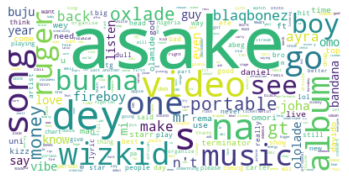

In [42]:
tweet_wc = WordCloud(collocations = False,max_words=400, background_color = 'white').generate(tweets_long_string)

# Display the generated Word Cloud
plt.imshow(tweet_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
print("There are {} types of languages in this dataset such as {}... \n".format(len(df.language.unique()), ", ".join(df.language.unique()[0:5])))

There are 35 types of languages in this dataset such as eu, en, tl, da, in... 



In [44]:
#Creating a treemap of the languages found in the Tweets
languages = df['language'].value_counts()
fig = px.treemap(languages, 
                 path=[languages.index],
                 values=languages.values, 
                 title = 'Languages',
                 color=languages.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
                 width=1000, height=500)

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))

fig.show()

From this chart we can see that English is the most common language frim the Tweets related to Asake. Language codes could be found using https://www.loc.gov/standards/iso639-2/php/code_list.php.

In [45]:
tableau_df = df.drop((['Processed_Tweets', 'Positive', 'Negative', 'Neutral',	'Polarity_2']), axis = 1)

tableau_df.head()

,id,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to,Hashtags,Tracks,Sentiment
0,1583100211819212801,1583100211819212801,2022-10-20,14:17:57,0,1246197514249932806,odogwu17451259,MASTER PUSSY,Asake,eu,[],[],[],0,0,0,[],[],https://twitter.com/odogwu17451259/status/1583...,False,0,[],,,Neutral
1,1583100043338207232,1583100043338207232,2022-10-20,14:17:17,0,4914258442,lagosjumpradio,LagosJump Radio,#NowPlaying: Peace Be Unto You (PBUY Remix) by...,en,[],['http://bit.ly/lagosjumpMobile'],[],0,0,0,"['nowplaying', 'afrobeats']",[],https://twitter.com/LagosJumpRadio/status/1583...,False,0,[],nowplaying afrobeats,,Positive
2,1583099719550926849,1583099719550926849,2022-10-20,14:16:00,0,714967514074259456,okoronkwoedward,PerfectImperfection,Mr Money (Asake),en,[],[],[],0,0,0,[],[],https://twitter.com/OkoronkwoEdward/status/158...,False,0,[],,,Neutral
3,1583099509340798976,1583099509340798976,2022-10-20,14:15:10,0,3137190709,dhamorlah_,KING MUFASA 😎🤴🏾,Favorite line and one of the best intro #Asake...,en,[],[],['https://pbs.twimg.com/media/FfhMm2yXEAI7Wvm....,0,0,0,['asake'],[],https://twitter.com/dhamorlah_/status/15830995...,False,1,[],asake,,Positive
4,1583099343854178304,1583099343854178304,2022-10-20,14:14:30,0,634164671,metobiloba,Oluwatobi 🌟🥀,This Tiwa and Asake new song is sounding !!! 🔥...,tl,[],[],[],0,1,2,[],[],https://twitter.com/meTobiloba/status/15830993...,False,0,[],,,Positive


In [46]:
tableau_df.to_csv('Asake_File.csv', index=False)

# **CONCLUSION**

This file was exported to Harper DB Cloud to be managed and stored. Then connected to Tableau Desktop for the full visualization process.